In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
###state define
class Calculate_bmi_state(TypedDict):
    weight: float
    height : float
    bmi: float
    label: str

In [3]:
## create graph
graph = StateGraph(Calculate_bmi_state)

In [4]:
def Calculate_bmi_node(state:Calculate_bmi_state) -> Calculate_bmi_state:
    weight = state['weight']
    height = state['height']
    
    bmi = weight/(height**2)
    state['bmi'] = bmi
    
    return state
    

In [5]:
def label_node(state:Calculate_bmi_state)-> Calculate_bmi_state:
    bmi =state['bmi']
    if bmi < 18.5:
        state['label'] = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        state['label'] = 'Normal weight'
    elif 25 <= bmi < 29.9:
        state['label'] = 'Overweight'
    else:
        state['label'] = 'Obesity'
    return state


In [6]:
### create Node for graph
graph.add_node("Calculate_bmi_node",Calculate_bmi_node)
graph.add_node("label_node",label_node)

In [7]:
#### create Edge fro graph

graph.add_edge(START,"Calculate_bmi_node")
graph.add_edge("Calculate_bmi_node", "label_node")
graph.add_edge("label_node", END)

In [8]:
workflow = graph.compile()

In [9]:
initial_state = {"weight":20, "height":59}

final_state = workflow.invoke(initial_state)

In [10]:
print(final_state)

{'weight': 20, 'height': 59, 'bmi': 0.005745475438092502, 'label': 'Underweight'}


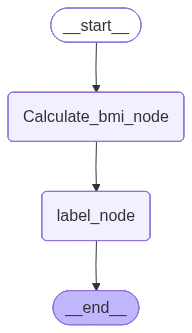

In [11]:

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())